In [1]:
import jupman


# Jupman Usage

Jupyter Python 3 worksheets build system and exam manager. See Jupman manual at [jupman.readthedocs.io](http://jupman.readthedocs.io)

Jupman uses [NbSphinx](http://nbsphinx.readthedocs.io/) and either [ReadTheDocs](https://readthedocs.org) or [Github Actions](https://github.com/features/actions)

## Installation

(Instructions are for Ubuntu, on Windows may differ)

First, on Github, fork as a template [jupman project](https://github.com/DavidLeoni/jupman) to create yours, for example `my-project`.

Then, on your computer, clone the `my-project` from Github 

You can choose to build either on:

- ReadTheDocs
- Github Actions
- locally with plain Sphinx
- locally with [RTD Docker](https://github.com/DavidLeoni/readthedocs-to-actions)

(Note Jupman itself is building on both ReadTheDocs and Github Actions only for testing purposes, one is enough)

### Building with ReadTheDocs:

**IMPORTANT: choose a name which is NOT already on** [ReadTheDocs](http://readthedocs.org)

Create a [ReadTheDocs account](http://readthedocs.org) **using the same name as in Github**
so the address in readthedocs will be something like _my-project.readthedocs.org_.

* Use ReadTheDocs panels to link the project to your Github repository.
* In _Admin-> Advanced settings panel_, set:
    * _Python interpreter_ to _CPython 3.x_ 
    * _Requirements_ to `requirements-build.txt`  
        

### Building with Github Actions:

Configure [.github/workflows/main.yml](https://github.com/DavidLeoni/jupman/blob/master/.github/workflows/main.yml) on your computer to your needs - you will need to:

1. at the beginning there is an `if` which makes the workflow only work in `DavidLeoni/jupman` repository, change it with your names
2. set RTD_PRJ_NAME 
3. If you want to publish to [Github Pages](https://pages.github.com/): everything is set, just create an empty branch `gh-pages` in an new HTML_FOLDER **before** committing - from some other folder in your file system:

```bash
git clone  YOUR_REPO_ADDRESS  HTML_FOLDER
cd HTML_FOLDER
git checkout --orphan gh-pages
git rm -rf .
touch bla
git add .
git commit -m "init"
git push origin gh-pages
```

### Local build with Sphinx

1. Install Python 3.7+
1. [Install Jupyter](http://jupyter.org/install.html)
1. Install Python modules -from the root of the project, run:
    ```bash
    python3 -m pip install --user -r requirements-build.txt
    ```
    This will install required modules in your home directory

### Optional - Running tests

To check everything is working, you may want to run the tests.

1. Install test dependencies: 

```bash
python3 -m pip install --user -r _test/requirements-test.txt
```

2. Run the tests:

```bash
python3 -m pytest _test/*_test.py
```


### Optional - Install Jupyter contrib extensions

For a better editing experience like having Table of contents and other things, do the following:


1. install the [Jupyter contrib extensions](https://github.com/ipython-contrib/jupyter_contrib_nbextensions) package:


If you have Anaconda:

```bash
conda install -c conda-forge jupyter_contrib_nbextensions 
```

If you don't have Anaconda:
```bash
python3 -m pip install --user jupyter_contrib_nbextensions
```

2. Install in Jupyter:

```bash
jupyter contrib nbextension install --user
```

3. Enable extension:

For being able to view table of contents while editing notebooks, install `toc2` extension:

```bash
jupyter nbextension enable toc2/main
```
For tocs to appear when in a document you will need to press a list button at the right-end of the toolbar.

(since Jupman 0.8 custom injected tocs are disabled by default)

4. For a nice GUI to install extensions, install the [Jupyter Nbextensions configurator](https://github.com/Jupyter-contrib/jupyter_nbextensions_configurator): 

If you have Anaconda:

From Anaconda Prompt:
```
conda install -c conda-forge jupyter_nbextensions_configurator 
```

If you don't have Anaconda:

```bash
python3 -m pip install --user jupyter_nbextensions_configurator
```

After installing, enable it: 

```bash
jupyter nbextensions_configurator enable --user
```
and then start Jupyter, in file browser look for a `Nbextensions` tab 
   


    
## Getting Started

1. Edit [conf.py](https://github.com/DavidLeoni/jupman/blob/master/conf.py) as needed, which is the configuration file for Sphinx. In particular, you **MUST** edit the sections marked with **TODO**
2. Try launching build:

    ```bash
    python3 build.py
    ```
    For more info, see [related section](#Building-the-manual)
3. If everything works fine on your computer, push changes back to Github
4. Go back to ReadTheDocs and try to run a build. Hopefully your project will become available on something like _my-project.readthedocs.org_
5. If you want to grade exams, see [Exams](#Exams) section.

You should now be ready to create your notebooks by launching from the project root:

```bash
 jupyter notebook
```

6. If you wish your notebooks to appear in the generated manual, you have to add them in the `toc.rst` file.

    **NOTE**: the page [toc-page.rst](https://github.com/DavidLeoni/jupman/blob/master/toc-page.rst), which is set to be the `master_doc` of Sphinx, will just load the actual Table of Contents which is in [toc.rst](https://github.com/DavidLeoni/jupman/blob/master/toc.rst). It looks a bit convoluted because when it comes to indexes Sphinx is not much reliable,  [see this issue](https://github.com/DavidLeoni/jupman/issues/11) . We strongly advise *not* to change these settings !
7. edit the home, which is in  the [index.ipynb](https://github.com/DavidLeoni/jupman/blob/master/index.ipynb) file



## Building the manual


For quick build that only produces html:

```bash
python3 build.py -q
```

Site will be created in `_build/` folder.


For help: 

```bash
python3 build.py -h
```


To build everything (html + pdf + epub), go to the console and from the root directory run:

```bash
python3 build.py
```


**NOTE: to generate PDFs you will need to install Latex environment**

## Publishing

For publishing, the system uses ReadTheDocs so it's enough to push to master and ReadTheDocs will do the rest (for example, for jupman is available at address [jupman.readthedocs.io](http://jupman.readthedocs.io) 

**IMPORTANT: ReadTheDocs WILL _NOT_ execute Jupyter notebooks because of** [this bug](https://github.com/DavidLeoni/softpython/issues/2)

## Editing the worksheets

Here we give an overview of how to edit worksheets. More info can be found in [Jupman tests notebook](jupman-tests.ipynb)



### Common files

There are a bunch of files common to all worksheets and possibly website 

*You do not need to change them (except maybe my_lib.py)*

|File|Description|Jupyter|Website|
|-----|----|----|-----|
|[jupman.py](https://github.com/DavidLeoni/jupman/blob/master/jupman.py)|utilities for worksheets|X||
|[my_lib.py](https://github.com/DavidLeoni/jupman/blob/master/jupman.py)|custom utilities for worksheets (you can change the name)|X||
|[_static/js/jupman.js](https://github.com/DavidLeoni/jupman/blob/master/_static/js/jupman.js)|Javascript code|X|X|
|[_static/css/jupman.css](https://github.com/DavidLeoni/jupman/blob/master/_static/css/jupman.css)|CSS|X||
|[_static/css/jupman-web.css](https://github.com/DavidLeoni/jupman/blob/master/_static/css/jupman-web.css)|CSS||X|


### Running Jupyter

First of all, run Jupyter from the root directory:


```bash
    jupyter notebook
```


### Source code for chapters

Put chapters one per folder, in the root. Any folder which doesn't start with underscore `_`  or `exam/` will be considered a chapter.

During build, each chapter gets automatically zipped and zip goes to `_static/generated`. So for example, `python-example/` produces a zip called `_static/generated/python-example.zip`, which will have these contents:

```


python-example
    _static
       js
          jupman.js
          toc.js
       css
          jupman.css
       img
          cc-by.png
    python-example.ipynb         
    lab.py      
    lab_test.py
    lab_sol.py
    jupman.py
    my_lib.py
```


The zip folder structure will be a merge of chapter files and files shared by all chapters which are specified in  `exercises_common_files` variable in [conf.py](conf.py). Since the root in the zip becomes the chapter itself, jupman will process `.py` and `.ipynb` files for fixing eventual relative imports. Markdown and HTML links in ipynb will also be adjusted.

Exercise files can be automatically generated from solutions, as we will see next.


### Exercise types

There can be three kinds of exercises: exercises in Python files,  exercises in Jupyter files and mixed jupyter and Python exercises.

You can automatically generate an exercise from a solution file by stripping text marked with special tags. You can inspect generated files in `_build/jupman/` directory

On the website, students will be able to see solutions by clicking on appropriate buttons.

In the zips to download, two versions of files will provided, one without solution and one with solutions (in exam modality of course no solution will be shipped)

#### Exercises in Python files

See [python-example/python-example.ipynb](python-example/python-example.ipynb)


In this type of exercises, typically you have a Jupyter file (like `python-example.ipynb`) that describes the exercise and then the actual exercises are in Python files. 


If there is a solution file `FILE_sol.py` ending in `_sol.py` but no corresponding exercise file `FILE.py` without the `_sol`: 

then Jupman will try to generate `FILE.py` one from `FILE_sol.py`. To do so, it will look for tags to strip inside the solution file.

If there is already an exercise file like this: 

* `python_intro.py`
* `python_intro_sol.py`

Jupman will just copy the existing file.

#### Exercises in Jupyter files

See example: [jupyter-example/jupyter-example-sol.ipynb](jupyter-example/jupyter-example-sol.ipynb)

This type of exercises stay in a Jupyter notebook itself.

If there is a notebook ending in `-sol.ipynb`, the following applies (**WARNING**: for `ipynb` files we use dash `-`, _not_ the underscore `_`):

- the notebook must contain tags to strip
- exercises derived will have 'EXERCISES' appended to the title (the word can be customized in `conf.py` - you might need to translate it)

#### Mixed exercises in Jupyter and Python files

See [jup-and-py-example/jup-and-py-example-sol.ipynb](jup-and-py-example/jup-and-py-example-sol.ipynb)

#### Challenges

<div class="alert alert-warning">
    
This is an experimental feature, current implementation is subject to change.
   
</div>

Challenges are solutions which remain unpublished and from which exercises are generated **in the same original older** where the solution resides (not only in the zip!). Challenge files  can be both Jupyter notebooks or Python files, ending in `-chal-sol.ipynb` or `_chal_sol.py`.  

The idea is that challenges solutions are gitignored, and exercises are manually generated by  calling `jupman.generate_exercise()` inside a Jupyter notebook like this:

```python
#jupman-purge
import sys; sys.path.append('../'); from conf import jm;
jm.generate_exercise('great_chal_sol.py')
#/jupman-purge
```

It is a bit laborious but the idea is that typically you will also want to  run and see tests results in Jupyter notebook so you can do it in the same final cell, which you will also probably want to set in cell metadata `"nbsphinx":"hidden"`

* the solution notebook must contain tags to strip and have SOLUTIONS at the end of the title  (the word can be customized in `conf.py` - you might need to translate it)

### Solution tags

Presence of these tags marks a cell as a solution.

Start tags begin with a `#` while end tags begin with a `#\`

#### jupman-raise

Replaces code inside with an Exception (text is customizable in `conf.py`). Be careful to position the comment exactly with the indentation yuoi want the raise to appear. For example:

```python

def add(x,y):   
    #jupman-raise
    return x + y
    #/jupman-raise

```

becomes

```python

def add(x,y):   
    raise Exception('TODO IMPLEMENT ME !')

```



#### jupman-strip

Just strips code inside exercises

```python
def f(x):
    print(x)
    
#jupman-strip
def help_func(x,y):
    return x - y
#/jupman-strip

def g(y):
    return y
```

becomes

```python
def f(x):
    print(x)

def g(y):
    return y
    
```



#### write here

This special tag for python code erases whatever is found afterwards the `# write here` **line**

* you can put how many spaces you want in the comment
* phrase can be customized in `conf.py`

```python

w = 5

#  write  here  fast please

x = 5 + w
y = 2 + x
```

becomes

```python

w = 5

#  write  here  fast please


```


#### SOLUTION

In a code cell, if you put `# SOLUTION` at the beginning the whole cell cell content gets deleted (`# SOLUTION` string included).

* Word can be customized in `conf.py`


```
# SOLUTION

def f():
    print('hello')
```

becomes nothing:


#### QUESTION - ANSWER

In a markdown cell, everything in a cell with `**ANSWER**:` inside will be stripped. 

* Markdown can be customized in `conf.py`

**QUESTION**: Describe why iPhone n+1 is better than iPhone n

<b>ANSWER</b>: it costs more

Becomes:

**QUESTION**: Describe why iPhone n+1 is better than iPhone n

### Directive tags

Some tags change the preprocessor behaviour. They are applied before solution tags.

#### jupman-purge

Eliminate content both from exercises AND solutions. Can be helpful when you have code which creates expected output, like images or python data - the idea is to completely remove code so so students don't accidentally copy-paste it or uncomment it.

* `jupman-purge-input`: purges only cell source
* `jupman-purge-output`: purges only cell output
* `jupman-purge-io` : purges both input and output

`jupman-purge` purges only a span:

```python
x=5
#jupman-purge
plt.savefig('expected_image.png')
jupman.save_py('expected_output_db.py', ['big', 'data', 'structure']*1000)    
#/jupman-purge
x=6
```
becomes

```python
x=5
x=6
```

#### jupman-preprocess

By default  only notebooks solutions (ending in `-sol.ipynb`) are preprocessed before  html conversion begins.  If you want to force preprocessing on a particular non-solution notebook, add this in the first cell:

```python
#jupman-preprocess
```

### Utilities and custom js and css

If you need custom js and/or css in a notebook, you can inject it by running `jupman.init()` in the first cell

**NOTE**: it is not really mandatory, it's mostly intended to tweak notebooks downloaded locally. It should be avoided for notebooks meant for students, as it is more likely it will mess their configurations - also, they might copy the notebooks without knowing they contain the custom js and use weird extensions which could generate conflicts (such as double toc)

For notebooks in the root folder:

```python
import jupman
jupman.init()
```
Worksheets in in subfolders can use `sys.path` to locate the module

```python
import sys
sys.path.append('../')
import jupman
jupman.init()
```
If you think it looks ugly, see [this issue](https://github.com/DavidLeoni/jupman/issues/12) for why we don't use alternatives such as modules and relative imports.

**Show table of contents**: Since 0.8, toc is disabled. If you want it, try to [install toc2 extension](#Optional---Install-Jupyter-contrib-extensions), otherwise you can still enable jupman toc with `jupman_init(toc=True)`. Running it will create the sidebar even when editing in Jupyter. If you want to refresh the sidebar, just run again the cell. It is not recommended, though, especially in notebooks meant to be shipped to students (see considerations above).


### Hiding cells

To hide cells (like for example the `import jupman` code), click `View->Cell toolbar -> Edit metadata`
and add `"nbsphinx": "hidden"` to the JSON (see also original [NBSphinx docs](
https://nbsphinx.readthedocs.io/en/0.2.14/hidden-cells.html#Hidden-Cells
) and [Togglable cells in Jupman tests](jupman-tests.ipynb#Togglable-cells) ).

**NOTE**: As of NBSphinx 2.17, it is not possible to hide only cell text but not the output.

#### Implications of hiding 'import jupman'

Only in the HTML version, hiding the `import jupman` code, will also prevent `jupman.py` to embed inside the page the Javascript file `jupman.js`: this is perfectly fine as it is fetched separately thanks to the `app.add_javascript('js/jupman.js')` command in `conf.py`




### Launch unit tests

Inside worksheets you can run `unittest` tests. 

To run all the tests of a test class, write like this

```python
jupman.run(NameOfTheTestClass)
```

To run a single method, write like this:

```python
jupman.run(NameOfTheTestClass.nameOfTheMethod)
```


### Python Tutor

Among the various ways to embed Python Tutor, we decided to implement a special `jupman.pytut()` method. First you need to import the jupman module:

In [2]:
import jupman

Then you can put a call to `jupman.pytut()` at the end of a cell, and the cell code will magically appear in python tutor in the output (except the call to `pytut()` of course). To see Python Tutor you don't need to be online

In [3]:
x = [5,8,4]
y= {3:9}
z = [x]

jupman.pytut()


Beware of variables which were initialized in previous cells, they won't be available in Python Tutor and you will get an error:

In [4]:
w = 8


In [5]:
x =  w + 5
jupman.pytut()

Traceback (most recent call last):
  File "/home/da/Da/prj/jupman/prj/jupman.py", line 2428, in _runscript
    self.run(script_str, user_globals, user_globals)
  File "/usr/lib/python3.7/bdb.py", line 578, in run
    exec(cmd, globals, locals)
  File "<string>", line 2, in <module>
NameError: name 'w' is not defined


### Pandas

Correctly rendering pandas in PDFs is not so easy ([see issue](https://github.com/DavidLeoni/jupman/issues/69)), so far we created this little function which sometimes is handy:

In [6]:
import pandas as pd 
    

lista = [['Rosanna', 'Gippalanda', 26, 100, 500, 300, 600, 600, 100, 300, 600, 300, 200, 400, 200, 300, 400, 500],
         ['Matilda', 'Zampola',    10, 500, 200, 300, 500, 400, 300, 200, 500, 300, 200, 400, 200, 300, 400, 500],
         ['Mario', 'Cipolli',      25, 300, 500, 100, 500, 300, 500, 100, 500, 300, 200, 400, 200, 300, 400, 500], 
         ['Ugo', 'Sgarapirri',     30, 100, 400, 200, 500, 300, 200, 600, 300, 300, 200, 400, 200, 300, 400, 500]
        ]
                  
df = pd.DataFrame(lista, columns =['Name', 'Surname', 'Age', *['Par'+str(i) for i in range(1,16)]])
df # web

,Name,Surname,Age,Par1,Par2,Par3,Par4,Par5,Par6,Par7,Par8,Par9,Par10,Par11,Par12,Par13,Par14,Par15
0,Rosanna,Gippalanda,26,100,500,300,600,600,100,300,600,300,200,400,200,300,400,500
1,Matilda,Zampola,10,500,200,300,500,400,300,200,500,300,200,400,200,300,400,500
2,Mario,Cipolli,25,300,500,100,500,300,500,100,500,300,200,400,200,300,400,500
3,Ugo,Sgarapirri,30,100,400,200,500,300,200,600,300,300,200,400,200,300,400,500


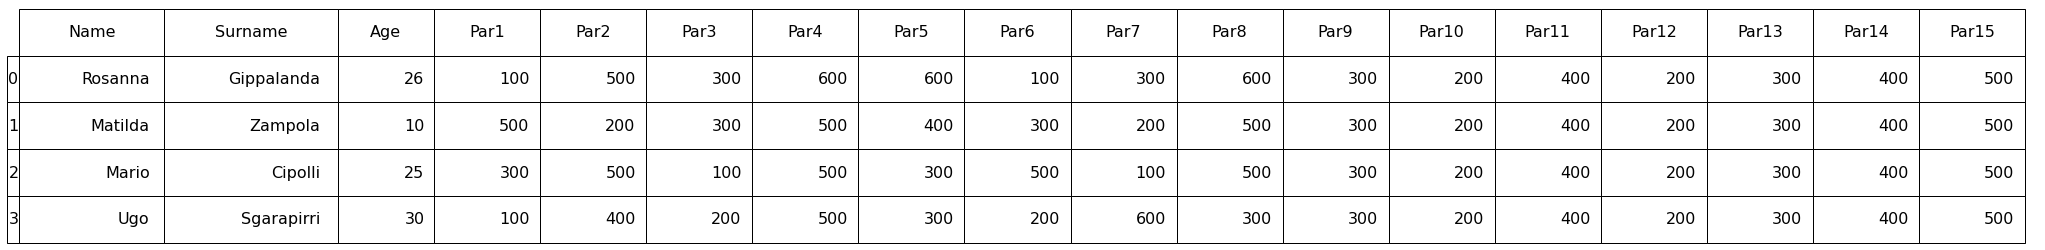

In [7]:
import jupman
jupman.draw_df(df)  # image for pdf

### Showing function help

Python help is already quite good, but adds two useless extra lines and only works as a print, so we defined `jupman.get_doc`:

In [12]:
print(jupman.get_doc(jupman.get_doc))

def get_doc(fun):
    """ Returns the help of a function formatted in a faithful manner
        
        @since 3.3
    """


## Website

### Customize theme

If you want to change site colors and other changes, copy/edit [_static/css/jupman-web.css](https://github.com/DavidLeoni/jupman/blob/master/_static/css/jupman-web.css)  and set it in conf `html_css_files`:

```python
html_css_files = [
    'css/jupman.css',      # shared among jupyter and website
    'css/jupman-web.css',  # only on website
    #'css/softpython-theme.css',  # uncomment to activate
    #'css/scifi-theme.css',
]

```

### Fonts

Fonts are a bit of a complex topic

TODO this part is just a collection of personal notes


* [The missing guide to font formats](https://creativemarket.com/blog/the-missing-guide-to-font-formats)

* https://docs.readthedocs.io/en/latest/guides/adding-custom-css.html

* [RTD Code font issue on github](https://github.com/readthedocs/sphinx_rtd_theme/issues/524)


Tools: 

Comprehensive article: https://www.useragentman.com/blog/2011/02/20/converting-font-face-fonts-quickly-in-any-os/
and https://www.useragentman.com/blog/the-css3-font-converter/


https://github.com/zoltan-dulac/css3FontConverter

woff2

https://github.com/google/woff2

sfnt2woff

```bash
sudo apt-get install  libbrotli-dev
sfnt2woff  SomeFont.otf
```

mkeot

```bash
sudo apt-get install eot-utils
mkeot SomeFont.otf > SomeFont.eot
```

or https://github.com/wget/ttf2eot

FontForge (GUI and scriptable)

`sudo apt-get install fontforge`


### font sizes

https://www.24a11y.com/2019/pixels-vs-relative-units-in-css-why-its-still-a-big-deal/

https://chiamakaikeanyi.dev/sizing-in-css-px-vs-em-vs-rem/


### Warning about old versions

[ReadTheDocs has a mechanism](https://docs.readthedocs.io/en/latest/versions.html) to warn the user if he's looking at an old version of the site, but we found it doesn't work much for course-based documentation. So for versioning we think it's better to adopt a mixed git branch / tags devlopment model, and we added a template warning to show in old branches. To enable it in an old branch, just rename [_templates/breadcrumbs.html.bak](_templates/breadcrumbs.html.bak) into `_templates/breadcrumbs.html` and edit as needed.


## Exams

Jupman comes with a script to manage exams called [exam.py](exam.py), which allows to manage the full cycle of an exam.



### What is an exam

**Exam text** is represented as Jupyter notebooks, which are taken from [_templates/exam/solutions/exam-yyyy-mm-dd.ipynb](_templates/exam/solutions/exam-yyyy-mm-dd.ipynb)

**Exercises for students**: they are supposed to be the exam notebook itself and / or plain python files (or the notebook itself) plus unittests and relative solutions. 

**Marks spreadsheet**: By default there is also an LibreOffice spreadsheet to give marks, in case you need it. 

When you initialize an exam with the `init` command, for example for date `2000-12-31`, all the presets in `_templates/exam/` are copied to `private/2000-12-31/` and `private/2000-12-31/solutions`. Presets can be changed at will to suit your needs. When packaging, student zip is assembled in  `private/2000-12-31/student-zip`

System is flexible enough so you can privately work on next exams in `private/` folder and still being able to publish modifications to main website. After an exam, you can copy the private exam to the public folders in `past-exams/`.    


### Exam commands

To see the help:

```bash
python3 exam.py -h
```

To see help for a particular subcommand, like i.e. `init`, type the subcommand followed by `-h` :

```bash
python3 exam.py init -h
```

Running commands should be quite self-explanatory.

NOTE: as of today (Dec 2019) software may contain bugs, but at least we check for major misuses 
(like trying to overwrite existing exams). 

In the file [create-exam-example.sh](create-exam-example.sh) there is a typical run of the 
script, which creates the example exam for date `2000-12-31`. Notice it might ask
you to delete the existing 2000-12-31 exam, if it does just follow the instructions.
Here's the output:


```bash
> ./create-exam-example.sh 
python3 exam.py init 2000-12-31
  Detected release from git: 3.2.0-3-g30a995c
No GOOGLE_ANALYTICS environment variable was found, skipping it
  
  You can now edit Python solutions, tests, exercises and exam notebook here  : 

     _private/2000-12-31/solutions

  DONE.

python3 exam.py package 2000-12-31
  Detected release from git: 3.2.0-3-g30a995c
No GOOGLE_ANALYTICS environment variable was found, skipping it
  Cleaning _private/2000-12-31/server/jupman  ...
  Copying exercises to _private/2000-12-31/student-zip/jupman-2000-12-31-FIRSTNAME-LASTNAME-ID/
  Copying code  
    from  _private/2000-12-31/solutions 
    to    _private/2000-12-31/student-zip/jupman-2000-12-31-FIRSTNAME-LASTNAME-ID/
    Writing (patched) _private/2000-12-31/student-zip/jupman-2000-12-31-FIRSTNAME-LASTNAME-ID/exam-2000-12-31.ipynb
    Generating _private/2000-12-31/student-zip/jupman-2000-12-31-FIRSTNAME-LASTNAME-ID/trees.py
    Writing _private/2000-12-31/student-zip/jupman-2000-12-31-FIRSTNAME-LASTNAME-ID/example.txt 
    Generating _private/2000-12-31/student-zip/jupman-2000-12-31-FIRSTNAME-LASTNAME-ID/lists.py
    Writing (patched) _private/2000-12-31/student-zip/jupman-2000-12-31-FIRSTNAME-LASTNAME-ID/trees_test.py
    Writing (patched) _private/2000-12-31/student-zip/jupman-2000-12-31-FIRSTNAME-LASTNAME-ID/lists_test.py
  Creating dir _private/2000-12-31/student-zip/jupman-2000-12-31-FIRSTNAME-LASTNAME-ID/img
    Writing _private/2000-12-31/student-zip/jupman-2000-12-31-FIRSTNAME-LASTNAME-ID/img/mountains.jpg 
  Building pdf ..
  Creating student exercises zip:  _private/2000-12-31/server/jupman-2000-12-31-exam.zip
  Writing jupman.py
  Writing my_lib.py
  Writing _static/img/cc-by.png
  Writing _static/js/jupman.js
  Writing _static/css/jupman.css
  Writing _static/js/toc.js
  Writing _static/js/pytutor-embed.bundle.min.js
  Wrote _private/2000-12-31/server/jupman-2000-12-31-exam.zip

  DONE.


------- Simulating some shipped exams...
mkdir -p _private/2000-12-31/shipped/john-doe-112233
cp _templates/exam/solutions/lists_sol.py _templates/exam/solutions/lists_test.py _templates/exam/solutions/trees_sol.py _templates/exam/solutions/trees_test.py _private/2000-12-31/shipped/john-doe-112233
mkdir -p _private/2000-12-31/shipped/jane-doe-445566
cp _templates/exam/solutions/lists_sol.py _templates/exam/solutions/lists_test.py _templates/exam/solutions/trees_sol.py _templates/exam/solutions/trees_test.py _private/2000-12-31/shipped/jane-doe-445566
------- Done with shipped exams simulation, time to grade ...

python3 exam.py grade 2000-12-31
  Detected release from git: 3.2.0-3-g30a995c
No GOOGLE_ANALYTICS environment variable was found, skipping it
  Copying Python files to execute and eventually grade in _private/2000-12-31/graded/john-doe-112233/graded
  Copying original shipped files (don't touch them!) in _private/2000-12-31/graded/john-doe-112233/shipped
  Copying Python files to execute and eventually grade in _private/2000-12-31/graded/jane-doe-445566/graded
  Copying original shipped files (don't touch them!) in _private/2000-12-31/graded/jane-doe-445566/shipped

  DONE.

python3 exam.py zip-grades 2000-12-31
  Detected release from git: 3.2.0-3-g30a995c
No GOOGLE_ANALYTICS environment variable was found, skipping it

  You can now find zips to send to students in _private/2000-12-31/graded


  DONE.

python3 exam.py publish 2000-12-31
  Detected release from git: 3.2.0-3-g30a995c
No GOOGLE_ANALYTICS environment variable was found, skipping it
  Copying solutions to exams/2000-12-31/solutions
  Copying exam PDF text
  
  Exam Python files copied.
  
  You can now manually build and run the following git instructions to publish the exam.
    ./build.py
    git status  # just to check everything is ok
    git add .
    git commit -m 'published 2000-12-31 exam'
    git push
  

  DONE.


  Finished example exam run !!

```



## Developer notes

### Fix nbsphinx to create rst files 

Sometimes nbsphinx does not report properly RST conversion errors ([see bug](https://github.com/DavidLeoni/jupman/issues/9)). As a hacky workaround, you might take the `nbsphinx.py` from `~/.local/lib/python3.5/site-packages/` , make a copy of it in your project home and patch it  [like this](https://github.com/DavidLeoni/jupman/commit/0f332629ce4e2b0186c954c55aea7fa67992ace9#diff-bd3d9c4d2e80ed83fd2443d1301aa65bR649) 
When you call sphinx, it will generate RST files in `_build/jupman-rst/`.

Of course, things can be cleaner using a virtual env [with venv](https://docs.python.org/3/library/venv.html)

### Git performance notes

Current suggested setup for hosting on Github is creating branch gh-pages and using Github Actions to populate it with html, zips, pdf and epub files. While keeping all that stuff versioned may seem pretty inefficient, apparently git is [pretty good](https://stackoverflow.com/a/48305739) at compressing binary files 

The size of `.git` repo for a 1000 pdf page project SoftPython with 300 commits and 100 MB of code is:

```
.git: 183 MB
```

By truncating gh-pages to last commit and garbage collecting, we get:

```
.git: 139 MB
```

If we completely remove gh-pages branch, we get:

```
.git: 68.7 MB
```

So gh-pages size is:

- one commit: 70.3 MB
- 300 commits: 114.3 MB

which is not even double than source code git size. 

If the repo gets really huge, in order to to shrink it some git knowledge is required.

**If the repo is served from another server** and you want to truncate that server git repo:

On that server console:

1. first make sure you are on `gh-pages` branch:

```bash
git checkout gh-pages
```

2. truncates previous commits:
```bash
git fetch --depth=1 origin gh-pages
```

3. removes various links around which may still point to old commits:

```bash
git reflog expire --expire-unreachable=now --all
```

4. actually deletes from disk old commits:

```bash
git gc --aggressive --prune=all 
```

Note the result of truncation cannot be pushed back to origin as git would complain it is a _shallow_ branch.